# Кластеризация, пространственная кластеризация и геодемография

Ссылка на курс "Геопространственный анализ данных":\
https://darribas.org/gds_course/content/home.html

Ссылка на книгу "Геопространственный анализ данных":\
https://geographicdata.science/book/intro.html

Часть F\
https://darribas.org/gds_course/content/bF/diy_F.html

**Задачи проекта:**

**Задание 1. Геодемография Нью-Йорка**

*Описание проекта:*\
Определить (географический) характер Нью-Йорка.

*Исходные данные:*\
Участки переписи населения Нью-Йорка.\
Участки переписи населения — это географические территории, которые Бюро переписи населения США использует для территорий с населением около 4000 человек. Мы будем использовать набор данных, подготовленный в рамках примеров библиотеки PySAL. Географически это набор полигонов, охватывающих всю площадь города Нью-Йорка.

*Задачи:*\
Создать геодемографическую классификацию, используя следующие переменные:
*   european — белые, не латиноамериканцы;
*   asian — американцы азиатского происхождения;
*   american — американские индейцы;
*   african — афроамериканцы;
*   hispanic — латиноамериканцы;
*   mixed — население смешанных рас;
*   pacific — жители Океании.

Стандартизировать таблицу по размеру каждого тракта — вычислить столбец с общей численностью населения как сумму всех этнических групп и разделить каждую из них на этот столбец. Таким образом, значения будут варьироваться от 0 (населения данной этнической группы нет) до 1 (все население на участке принадлежит к этой группе).

1.   Выбрать количество кластеров (например, 10);
2.   Запустить алгоритм k-means для этого количества кластеров;
3.   Нанести различные кластеры на карту;
4.   Проанализировать результаты:
   *   Что обнаружено?
   *   Каковы основные характеристики каждого кластера?
   *   Каким образом кластеры распределены географически?
   *   Можно ли выделить некоторые группы, сконцентрированные в определенных районах (например, Чайнатаун, Маленькая Италия)?

**Задание 2. Районирование Дар-эс-Салама**

*Исходные данные:*\
Набор данных, собранный для описания застроенной среды центра города Дар-эс-Салам, Танзания.\
Ссылка на данные:\
http://darribas.org/gds_course/content/data/dar_es_salaam.geojson

Даны два основных аспекта застроенной среды: уличная сеть и здания.
Для дальнейшего анализы рассчитаны следующие переменные для системы шестиугольной сетки H3, уровень масштабирования 8:
*   Плотность застройки: количество зданий на шестиугольник;
*   Покрытие зданий: доля шестиугольника, занятая зданиями;
*   Длина улицы: общая длина улиц в шестиугольнике;
*   Линейность улиц: мера регулярности уличной сети.

*Задачи:*\
Провести районирование, которое разделит Дар-эс-Салам в соответствии с его антропогенной средой. Для этого возможно использовать следующие рекомендации:
*   Создать матрицу пространственных весов для фиксации пространственных отношений между шестиугольниками;
*   Настроить алгоритм районирования с заданным количеством кластеров (например, семь);
*   Создать географию, содержащую только границы каждого региона, и визуализировать ее (в идеале, использовать спутниковое изображение в качестве базовой карты для создания контекста);
*   Сбросить и повторите с несколькими комбинациями переменных и количеством кластеров;
*   Выбрать наиболее оптимальный результат. Обосновать, почему вы выбрали его? Что это показывает? Каковы основные группы территорий по антропогенной среде?

## Этап 1. Импорт библиотек и настройка отображения данных

### Импорт библиотек

In [1]:
# Установим библиотеку 'pysal'
! pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.3/347.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243

In [2]:
# Установим библиотеку 'contextily'
! pip install contextily

In [3]:
# Импортируем библиотеки
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import contextily as cx

from pysal.lib import examples
from pysal.lib import weights
from sklearn import cluster

При анализе пространственных данных существует подгруппа методов, представляющих особый интерес для многих распространенных случаев в области геоинформационной науки. Это так называемые методы районирования.

Методы районирования могут принимать также много форм и лиц, но в своей основе все они включают статистическую группировку наблюдений с дополнительным ограничением, что наблюдения должны быть географически соседними для того, чтобы быть в одной категории.

### Настройка отображения данных

In [4]:
# Настроим отображение максимального количества колонок
pd.set_option('display.max_columns', None)

In [5]:
# Настроим отображение максимального количества символов в столбцах
# pd.set_option('display.max_colwidth', None)

 ## Этап 2. Ответы на вопросы исследования

### Задание 1. Геодемография Нью-Йорка

**Задание 1. Геодемография Нью-Йорка**

*Описание проекта:*\
Определить (географический) характер Нью-Йорка.

*Исходные данные:*\
Участки переписи населения Нью-Йорка.\
Участки переписи населения — это географические территории, которые Бюро переписи населения США использует для территорий с населением около 4000 человек. Мы будем использовать набор данных, подготовленный в рамках примеров библиотеки PySAL. Географически это набор полигонов, охватывающих всю площадь города Нью-Йорка.

*Задачи:*\
Создать геодемографическую классификацию, используя следующие переменные:
*   european — белые, не латиноамериканцы;
*   asian — американцы азиатского происхождения;
*   american — американские индейцы;
*   african — афроамериканцы;
*   hispanic — латиноамериканцы;
*   mixed — население смешанных рас;
*   pacific — жители Океании.

Стандартизировать таблицу по размеру каждого тракта — вычислить столбец с общей численностью населения как сумму всех этнических групп и разделить каждую из них на этот столбец. Таким образом, значения будут варьироваться от 0 (населения данной этнической группы нет) до 1 (все население на участке принадлежит к этой группе).

1.   Выбрать количество кластеров (например, 10);
2.   Запустить алгоритм k-means для этого количества кластеров;
3.   Нанести различные кластеры на карту;
4.   Проанализировать результаты:
   *   Что обнаружено?
   *   Каковы основные характеристики каждого кластера?
   *   Каким образом кластеры распределены географически?
   *   Можно ли выделить некоторые группы, сконцентрированные в определенных районах (например, Чайнатаун, Маленькая Италия)?

#### Исходные данные

In [6]:
# Загрузим набор приготовленных данных из примеров библиотеки 'pysal'
examples.explain('NYC Socio-Demographics')

Чтобы проверить рассположение файлов, составляющих набор данных, загрузим его с помощью load_example и проверим с помощью get_file_list.

In [7]:
# Загрузим пример из библиотеки 'PySAL'
nyc_data = examples.load_example("NYC Socio-Demographics")
# Выведем пути ко всем файлам в наборе данных
nyc_data.get_file_list()

['/root/.local/share/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.dbf',
 '/root/.local/share/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.prj',
 '/root/.local/share/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shx',
 '/root/.local/share/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.dbf',
 '/root/.local/share/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.prj',
 '/root/.local/share/pysal/NYC_Socio-Demographics/__MACOSX/._NYC_Tract_ACS2008_12.shp',
 '/root/.local/share/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shx',
 '/root/.local/share/pysal/NYC_Socio-Demographics/NYC_Tract_ACS2008_12.shp']

<Axes: >

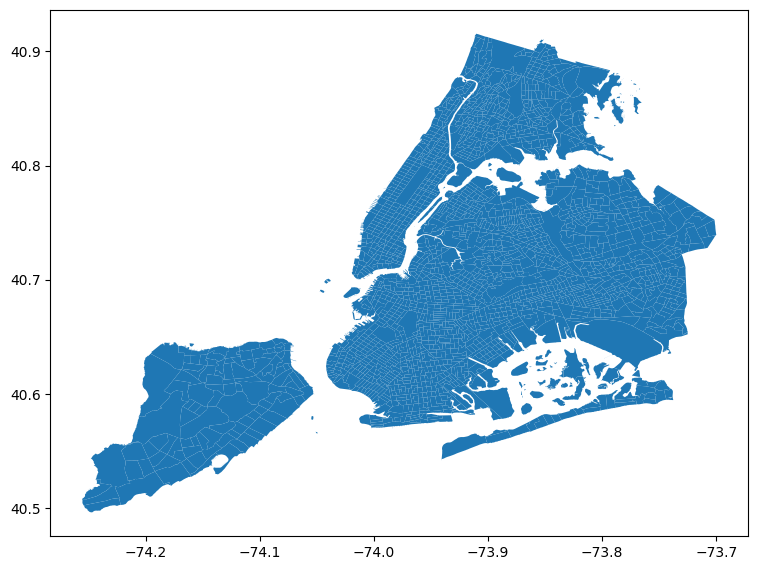

In [8]:
# Прочитаем файл
nyc = gpd.read_file(nyc_data.get_path('NYC_Tract_ACS2008_12.shp'))
# Выведем данные файла в график
nyc.plot(figsize=(9, 9))

### Предобработка данных

In [9]:
# nyc.sample(n=1, random_state=None)

In [10]:
# Выведем первые три строки датасета 'nyc'
nyc['geo_name'].head(3)

0    Census Tract 1, New York city (part), Manhatta...
1    Census Tract 2.01, New York city (part), Manha...
2    Census Tract 2.02, New York city (part), Manha...
Name: geo_name, dtype: object

In [11]:
# Создадим новый столбец с наименованием боро (района) Нью-Йорка
nyc['boroname'] = nyc['geo_name'].str.split(', ', n=4, expand=True)[2]
nyc['boroname'] = nyc['boroname'].str.replace(' borough', '', regex=True)
nyc['boroname'].unique()

array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island', None],
      dtype=object)

In [12]:
# Выведем наименования всех столбцов в список
nyc.columns.sort_values(ascending=True).to_list()

['UNEMP_RATE',
 'african',
 'africaninl',
 'africanune',
 'american',
 'americanin',
 'americanun',
 'asian',
 'asianinlab',
 'asianunemp',
 'bachelor',
 'borocode',
 'boroct2010',
 'boroname',
 'cartodb_id',
 'cdeligibil',
 'college',
 'com_90plus',
 'comm_15_29',
 'comm_30_44',
 'comm_45_59',
 'comm_5_14',
 'comm_5less',
 'comm_60_89',
 'ct2010',
 'ctlabel',
 'doctorate',
 'european',
 'europeanin',
 'europeanun',
 'fem_BA',
 'fem_HS',
 'fem_colleg',
 'fem_doctor',
 'fem_lessHS',
 'fem_master',
 'fem_profes',
 'femal16_19',
 'female',
 'femaledrop',
 'femaleinla',
 'femaleover',
 'femaleunem',
 'field_1',
 'geo_county',
 'geo_fips',
 'geo_geoid',
 'geo_name',
 'geo_place',
 'geo_state',
 'geo_stusab',
 'geometry',
 'gini',
 'highschool',
 'hispanic',
 'hispanicin',
 'hispanicun',
 'househol_1',
 'households',
 'lessthan10',
 'lessthanhi',
 'male',
 'male16to19',
 'male_BA',
 'male_HS',
 'male_collg',
 'male_doctr',
 'male_lesHS',
 'maledrop',
 'maleinlabo',
 'malemastr',
 'maleover18

### Стандартизация таблицы

Стандартизируем таблицу по размеру каждого тракта. Для этого вычислим столбец с общей численностью населения как сумму всех этнических групп и разделим каждую из них на этот столбец.

In [13]:
# Вычислим общую численность населения всех этнических групп для каждого тракта и запишем ее в новый столбец 'total'
nyc['total'] = nyc['european'] + nyc['asian'] + nyc['american'] + nyc['african'] + nyc['hispanic'] + nyc['mixed'] + nyc['pacific']

In [14]:
# Стандартизируем численность этнических групп по размеру каждого тракта
nyc['european_std'] = np.where(nyc['european'] != 0, nyc['european'] / nyc['total'], nyc['european'])
nyc['asian_std'] = np.where(nyc['asian'] != 0, nyc['asian'] / nyc['total'], nyc['asian'])
nyc['american_std'] = np.where(nyc['american'] != 0, nyc['american'] / nyc['total'], nyc['american'])
nyc['african_std'] = np.where(nyc['african'] != 0, nyc['african'] / nyc['total'], nyc['african'])
nyc['hispanic_std'] = np.where(nyc['hispanic'] != 0, nyc['hispanic'] / nyc['total'], nyc['hispanic'])
nyc['mixed_std'] = np.where(nyc['mixed'] != 0, nyc['mixed'] / nyc['total'], nyc['mixed'])
nyc['pacific_std'] = np.where(nyc['pacific'] != 0, nyc['pacific'] / nyc['total'], nyc['pacific'])

In [15]:
# Стандартизируем численность этнических групп по размеру каждого тракта
# nyc['european_std'] = nyc['european'] / nyc['total']
# nyc['asian_std'] = nyc['asian'] / nyc['total']
# nyc['american_std'] = nyc['american'] / nyc['total']
# nyc['african_std'] = nyc['african'] / nyc['total']
# nyc['hispanic_std'] = nyc['hispanic'] / nyc['total']
# nyc['mixed_std'] = nyc['mixed'] / nyc['total']
# nyc['pacific_std'] = nyc['pacific'] / nyc['total']

Таким образом, значения стали варьироваться от 0 (населения данной этнической группы нет) до 1 (все население на участке принадлежит к этой группе).

In [16]:
# # Запишем стандартизированную численность этнических групп в подмножество
population = [
    'european_std',
    'asian_std',
    'american_std',
    'african_std',
    'hispanic_std',
    'mixed_std',
    'pacific_std'
]

In [17]:
# from shapely import unary_union
# manhattan = unary_union(nyc.loc[nyc['boroname'] == 'Manhattan', 'geometry']).centroid
# manhattan
# # merged_boro = unary_union(manhattan)
# # merged_boro.centroid.x
# # merged_boro.apply(lambda x: ax.annotate(s=x.boroname, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)

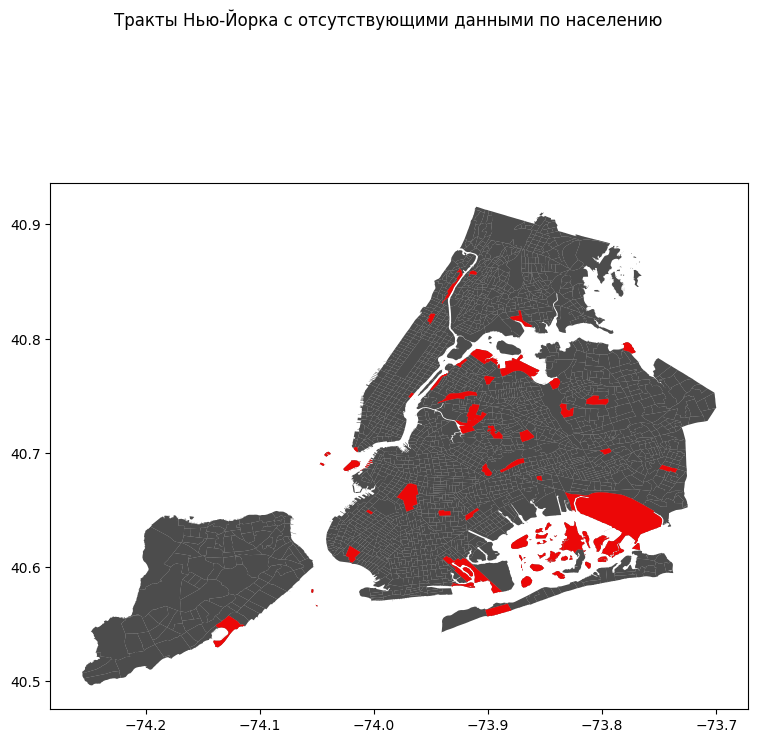

In [18]:
# Посмотрим на пространственное распределение трактов Нью-Йорка с отсутствующими данными по населению
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График со всеми полигонами (переписными участками) Нью-Йорка
nyc.plot(
    ax=ax,
    facecolor='k',
    linewidth=0.1,
    alpha=0.7
    )
# Выборка трактов Нью-Йорка с отсутствующими данными по населению
zero = nyc.loc[(nyc['european'] == 0) & (nyc['asian'] == 0) & (nyc['american'] == 0) & (nyc['african'] == 0) & (nyc['hispanic'] == 0) & (nyc['mixed'] == 0) & (nyc['pacific'] == 0), ['geometry']]
# График трактов Нью-Йорка с отсутствующими данными по населению
zero.plot(
    ax=ax,
    facecolor='red',
    alpha=0.9,
    linewidth=0
    )
# Добавим наименование районов на карту
#
# Добавим базовую карту
# cx.add_basemap(
#     ax,
#     crs=nyc.crs,
#     source=cx.providers.CartoDB.DarkMatter
#     )
# Заголовок
f.suptitle("Тракты Нью-Йорка с отсутствующими данными по населению")
# Стиль и отображение
# ax.set_ylim()
# ax.set_xlim()
# Отображение графика
plt.show()
# Сохранить график в файл формата 'PNG'
# plt.savefig('emty_nyc.png', dpi=500)
# Скрыть отображение осей
# ax.set_axis_off();

### Графики пространственного распределения

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  self.bins = quantile(y, k=k)


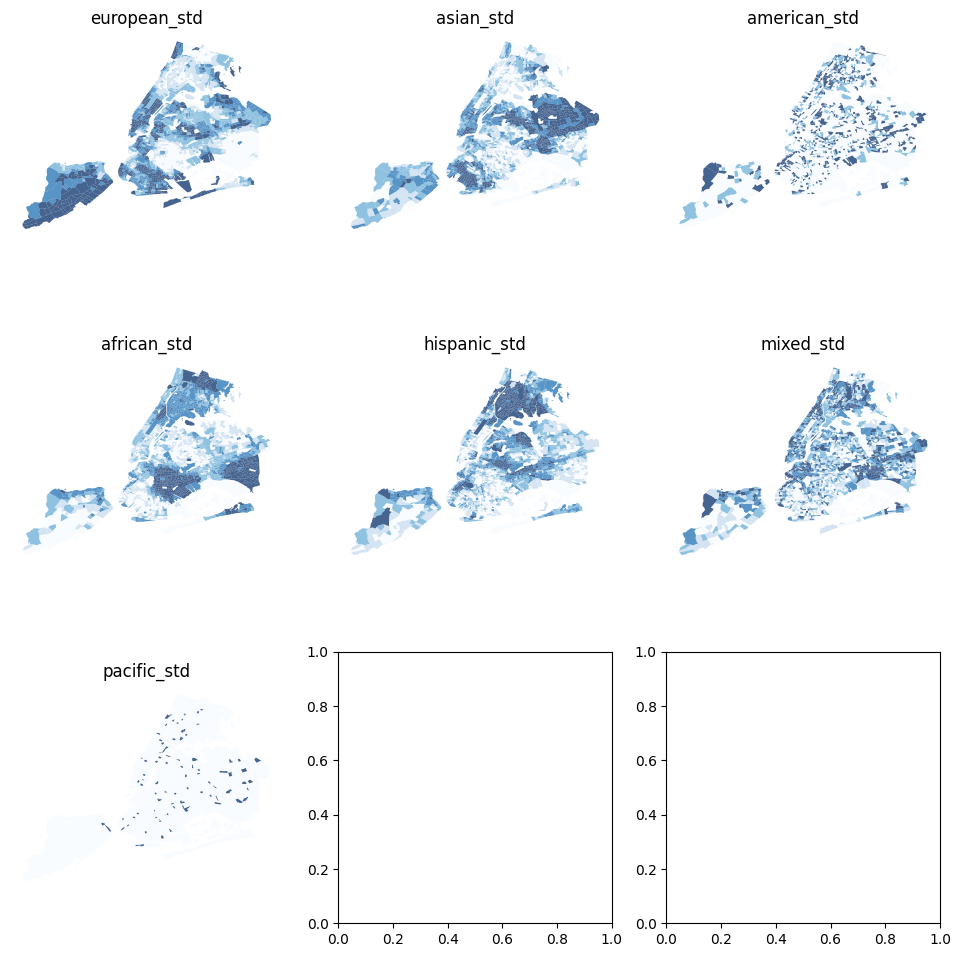

In [19]:
# Настройка фигуры и осей графика
f, axs = plt.subplots(3, 3, figsize=(12, 12))
# Сделаем оси доступными с помощью одинарной индексации
axs = axs.flatten()
# Построим график со всеми трактами (переписными участками) Нью-Йорка
# Запустим цикл для построения графиков со всеми интересующими переменными
for i, col in enumerate(population):
  # Выберем ось для отображения карты
  ax = axs[i]
  # Построим карты
  nyc.plot(
      column=col,
      ax=ax,
      scheme='Quantiles',
      linewidth=0,
      cmap='Blues',
      alpha=0.75
  )
  # Скроем отображение осей
  ax.set_axis_off()
  # Установим заголовки осей с именем отображаемой переменной
  ax.set_title(col)
# Отобразим графики
plt.show()
# Сохраним графики в файл формата 'PNG'
# plt.savefig('nyc.png', dpi=500)

Как видно, существуют значительные различия в том, как этнические группы в Нью-Йорке распределяются в пространстве.

Переменные:
*   european — белые, не латиноамериканцы;
*   asian — американцы азиатского происхождения;
*   american — американские индейцы;
*   african — афроамериканцы;
*   hispanic — латиноамериканцы;
*   mixed — население смешанных рас;
*   pacific — жители Океании.

*   Высокая концентрация белого, не латиноамериканского, населения наблюдается на Манхэттане и в южной части Стейтен-Айленд;
*   Большая доля американцев азиатского происхождения проживает в северной части Куинса и на юго-западе Бруклина;
*   Американские индейцы распределены равномерно по Куинсу, Бронксу, Бруклину и Манхэттону, на Стейтен-Айленд сосредоточены в северо-западной его части;
*   Афроамериканская группа сосредоточена в северной части Бронкса, на севере Манхэттана, в южной части Куинса и в восточной части Бруклина;
*   Латиноамериканцы занимают практически всю территорию Бронкса, северную часть Куинса и тракты, расположенные в западной части Стейтен-Айленд;
*   Население смешанных рас распределено по всем районам точечно и преимущественно равномерно;
*   Жители Океании также распределены по Бронксу, Куинс, Манхэттану и Бруклину равномерно.

### Корреляционные матрицы

Чтобы получить общее представление о том, как относительно друг друга расслеяются этнические группы в Нью-Йорке, построим график корреляционной матрицы с двумерными корреляциями.

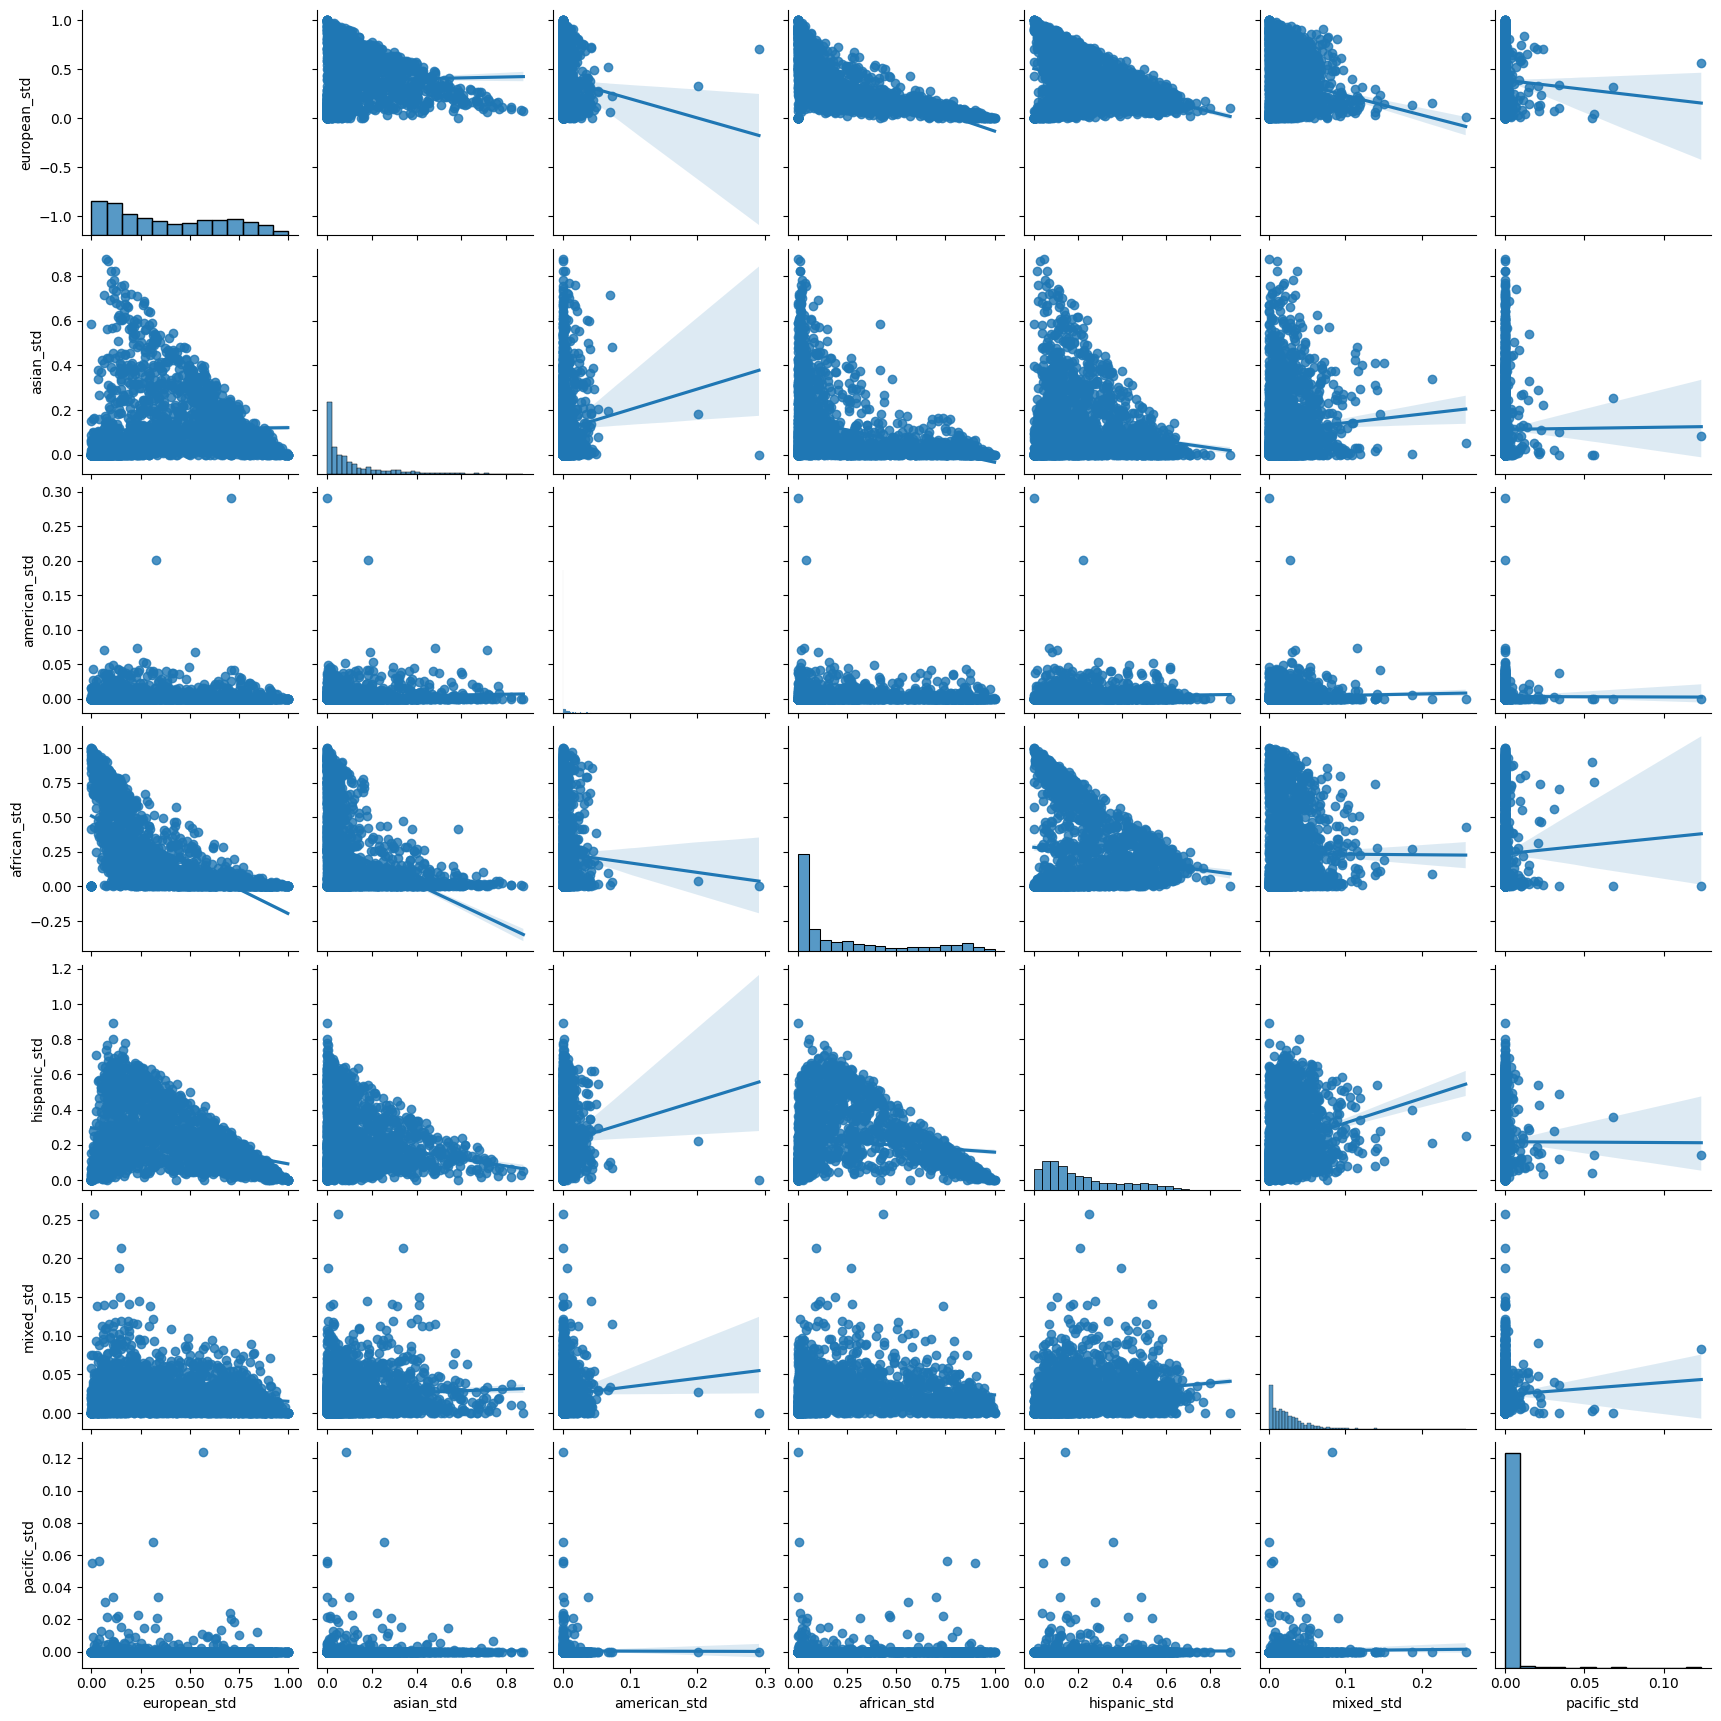

In [20]:
_ = sns.pairplot(nyc[population], kind='reg', diag_kind='hist')

### Кластеризация

In [21]:
# Запустим алгоритм кластеризации для десяти кластеров
kmeans10 = cluster.KMeans(n_clusters=10, random_state=12345)

In [22]:
# Запустим алгоритм кластеризации
k10cls = kmeans10.fit(nyc[population])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
k10cls.labels_

array([5, 8, 7, ..., 0, 7, 5], dtype=int32)

In [24]:
# Добавим метки кластеров в отдельный столбец
nyc['k10cls'] = k10cls.labels_

<Axes: >

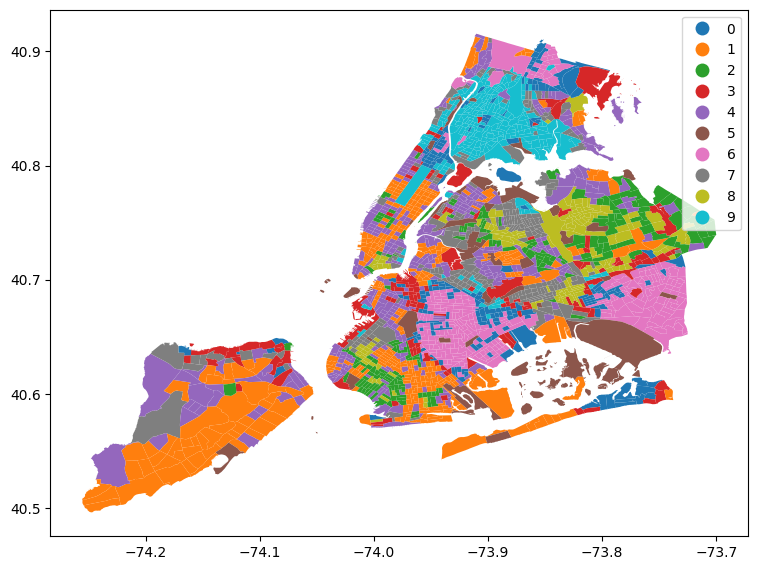

In [25]:
# Нанесем полученные кластеры на карту
f, ax = plt.subplots(1, figsize=(9,9))
nyc.plot(
    column='k10cls',
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax
)

Детальная карта восприятия жителями Нью-Йорка своих нейборхудов\
https://www.nytimes.com/interactive/2023/upshot/extremely-detailed-nyc-neighborhood-map.html

Далее изучим категории статистически. Это позволит нам охарактеризовать их, дав представление о том, какие наблюдения входят в состав каждого из них. В качестве первого шага давайте найдем, сколько наблюдений находится в каждой категории.



In [26]:
# Найдем, сколько наблюдений находится в каждой категории
k10sizes = nyc.groupby('k10cls').size()
k10sizes

k10cls
0    199
1    338
2    183
3    124
4    350
5     40
6    293
7    239
8    147
9    253
dtype: int64

Мы сгруппировали наблюдения по созданным категориям и подсчитали, сколько из них содержит каждая. Для более наглядного отображения результатов построим гистограмму.

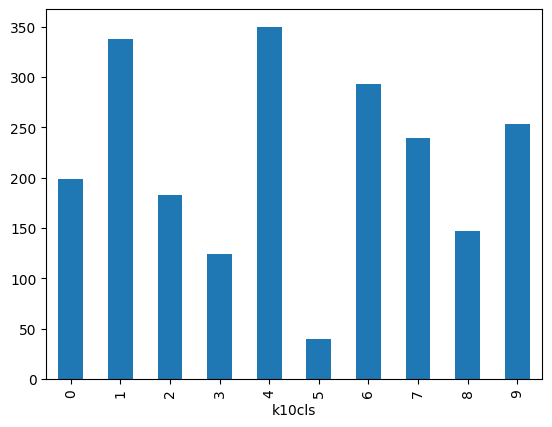

In [27]:
# Построим гистограмму по заданным категориям
_ = k10sizes.plot.bar()

Как и предполагалось по карте, группы различаются по размеру. Наиболее многочисленные группы — первая, четвертая, шестая, седьмая, девятая группы содержат более 200 наблюдений в каждой. Нулевая, вторая, третья и восьмая группы содержат от 100 до 200 наблюдений. Наименьшая по размеру группа — пятая с количеством наблюдений менее 50.

Чтобы описать природу каждой категории, в первую очередь взглянем на значения каждого из атрибутов, которые были использованы для их создания. Так как для создания классификации были использованы средние оценки по многим аспектам, начнем с проверки среднего значения каждого из них.

In [28]:
# Найдем средние значения параметров этнческих групп по кластерам
k10means = nyc.groupby('k10cls')[population].mean()
# Транспонируем полученную таблицу
k10means.T

k10cls               0         1         2         3         4    5         6  \
european_std  0.132961  0.842417  0.509408  0.319523  0.650771  0.0  0.049455   
asian_std     0.037615  0.056360  0.310918  0.092871  0.105631  0.0  0.020227   
american_std  0.003912  0.002539  0.002987  0.004276  0.002176  0.0  0.002139   
african_std   0.570457  0.016532  0.025973  0.307463  0.048222  0.0  0.834678   
hispanic_std  0.224042  0.068029  0.130406  0.239410  0.169289  0.0  0.076710   
mixed_std     0.030484  0.014049  0.020142  0.036128  0.023160  0.0  0.016068   
pacific_std   0.000529  0.000073  0.000167  0.000330  0.000751  0.0  0.000723   

k10cls               7         8         9  
european_std  0.353763  0.214037  0.148070  
asian_std     0.111207  0.508168  0.023613  
american_std  0.005020  0.006623  0.004610  
african_std   0.070921  0.063296  0.244369  
hispanic_std  0.430774  0.176202  0.547266  
mixed_std     0.027644  0.031299  0.031869  
pacific_std   0.000670  0.000375  0.000203

Cуть геодемографического подхода заключается в группировке областей на чисто статистической основе: место расположения каждой области не имеет значения для метки, которую она получает от алгоритма кластеризации. Во многих контекстах это не только допустимо, но даже желательно, поскольку интересно увидеть, распределяются ли конкретные комбинации значений в пространстве каким-либо заметным образом. Однако в другом контексте могут быть интересны созданные группы наблюдений, которые следуют определенным пространственным ограничениям. Для этого далее обратимся к методам районирования.

**Выводы:**
*   На карте выше представлено географическое распределение десяти категорий концентрации этнических групп, созданных алгоритмом K-средних;
*   Поверхностный анализ указывает на наличие сильной пространственной структуры в распределении цветов. Большие по размерам кластеры — с номерами один, четыре, шесть, семь, восемь и девять, — находятся в разных районах города. В то время как небольшие — с номерами ноль, два, три и пять, — распределены по городу более равномерно и чаще соседствуют друг с другом;
*   Также довольно четко можно проследить и соответствие полученных кластеров с этническими группами относительно нейборхудов. Например, розовый кластер с номером шесть хорошо "ложится" на Гарлем, Ямайку и Южную Ямайку. А бирюзовый кластер с номером девять — на Мотт Хавен (с преобладанием латиноамериканского населения) и т.д.

### Задание 2. Районирование Дар-эс-Салама

**Задание 2. Районирование Дар-эс-Салама**

*Исходные данные:*\
Набор данных, собранный для описания антропогенной среды центра города Дар-эс-Салам, Танзания.\
Ссылка на данные:\
http://darribas.org/gds_course/content/data/dar_es_salaam.geojson

Даны два основных аспекта застроенной среды: уличная сеть и здания.
Для дальнейшего анализы рассчитаны следующие переменные для системы шестиугольной сетки H3, уровень масштабирования 8:
*   Плотность застройки: количество зданий на шестиугольник;
*   Покрытие зданий: доля шестиугольника, занятая зданиями;
*   Длина улицы: общая длина улиц в шестиугольнике;
*   Линейность улиц: мера регулярности уличной сети.

*Задачи:*\
Разработать районирование, которое разделит Дар-эс-Салам в соответствии с его антропогенной средой. Для этого возможно использовать следующие рекомендации:
*   Создать матрицу пространственных весов для фиксации пространственных отношений между шестиугольниками;
*   Настроить алгоритм районирования с заданным количеством кластеров (например, семь);
*   Создать географию, содержащую только границы каждого региона, и визуализировать ее (в идеале, использовать спутниковое изображение в качестве базовой карты для создания контекста);
*   Сбросить и повторите с несколькими комбинациями переменных и количеством кластеров;
*   Выбрать наиболее оптимальный результат. Обосновать, почему вы выбрали его? Что это показывает? Каковы основные группы территорий по антропогенной среде?

### Исходные данные

In [29]:
# Загрузим данные по ссылке
data = gpd.read_file('http://darribas.org/gds_course/content/data/dar_es_salaam.geojson')
data.head()

index               id  street_length  street_linearity  \
0  897b4c16087ffff  897b4c8ce17ffff       0.011097          0.926700   
1  897b4c16097ffff  897b4c8ec67ffff       0.009181          0.983710   
2  897b4c160b3ffff  897b4c8eba3ffff       0.008357          0.962158   
3  897b4c160b7ffff  897b4c8dd97ffff       0.021292          0.884537   
4  897b4c16183ffff  897b4c8ce77ffff       0.008777          0.959906   

   building_density  building_coverage  \
0             138.0          15.789853   
1              33.0           3.722600   
2              82.0           9.491595   
3             122.0           7.245560   
4             113.0          11.806652   

                                            geometry  
0  POLYGON ((39.23750 -6.73264, 39.23752 -6.73071...  
1  POLYGON ((39.23914 -6.73559, 39.23916 -6.73366...  
2  POLYGON ((39.23416 -6.73254, 39.23418 -6.73061...  
3  POLYGON ((39.23082 -6.73244, 39.23084 -6.73050...  
4  POLYGON ((39.21745 -6.73202, 39.21747 -6.73009...

In [30]:
# Выведем наименования всех столбцов датасета в список
data.columns.to_list()

['index',
 'id',
 'street_length',
 'street_linearity',
 'building_density',
 'building_coverage',
 'geometry']

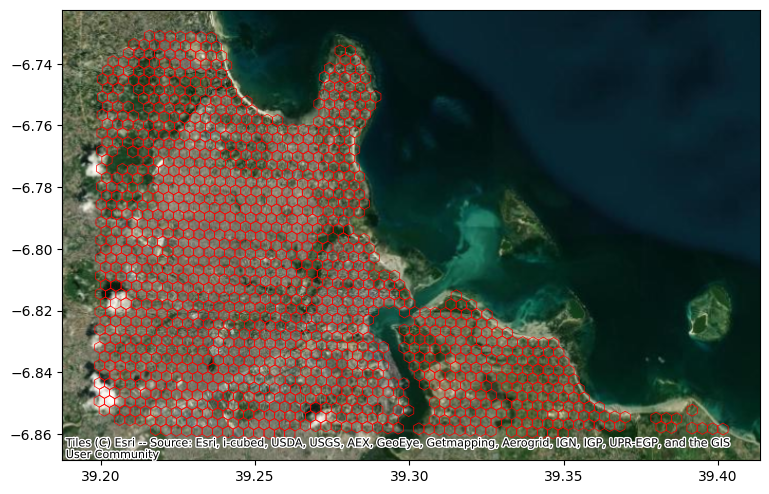

In [31]:
# График с гексагональной решеткой, покрывающий Дар-эс-Салам
ax = data.plot(
    facecolor="none",
    edgecolor="red",
    linewidth=0.5,
    figsize=(9, 9)
)
cx.add_basemap(
    ax,
    crs=data.crs,
    source=cx.providers.Esri.WorldImagery
);

In [32]:
# Выведем основную информацию о датафрейме
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              1291 non-null   object  
 1   id                 1291 non-null   object  
 2   street_length      1291 non-null   float64 
 3   street_linearity   1291 non-null   float64 
 4   building_density   1291 non-null   float64 
 5   building_coverage  1291 non-null   float64 
 6   geometry           1291 non-null   geometry
dtypes: float64(4), geometry(1), object(2)
memory usage: 70.7+ KB


### Районирование

Районирование — это подмножество методов кластеризации, которые накладывают пространственные ограничения на классификацию. Другими словами, результат алгоритма районирования содержит области, которые являются пространственно смежными. Фактически это означает, что эти методы объединяют области меньших областей в более крупные области, называемые районами.

In [33]:
# Для дальнейшего анализа запишем показатели антропогенной среды в отдельную переменную
built_env = [
    'street_length',
    'street_linearity',
    'building_density',
    'building_coverage'
]

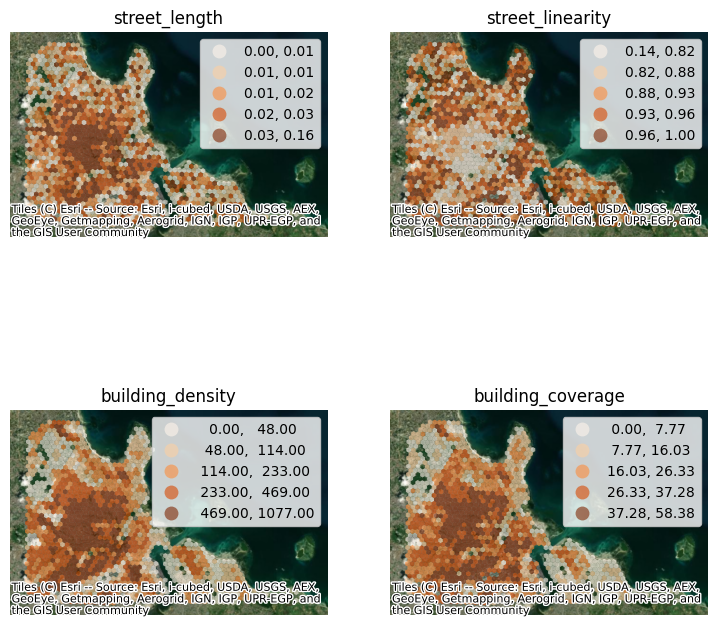

In [34]:
# Настройка фигуры и осей графика
f, axs = plt.subplots(2,2, figsize=(9, 9))
# Сделаем оси доступными с помощью одинарной индексации
axs = axs.flatten()
# Запустим цикл для построения графиков со всеми интересующими переменными
for i, col in enumerate(built_env):
  ax=axs[i]
  data.plot(
      column=col,
      scheme='Quantiles',
      legend=True,
      alpha=0.6,
      cmap='Oranges',
      ax=ax
      )
  # Скроем отображение осей
  ax.set_axis_off()
  # Установим заголовки осей с именем отображаемой переменной
  ax.set_title(col)
  # Базовая карта
  cx.add_basemap(
      ax,
      crs=data.crs,
      source=cx.providers.Esri.WorldImagery
      )
# Отображение
plt.show();

In [35]:
# Создадим матрицу пространственных весов для фиксации пространственных отношений между шестиугольниками, используя принцип "ферзя" (queen)
%time w = weights.Queen.from_dataframe(data)

CPU times: user 161 ms, sys: 75 µs, total: 161 ms
Wall time: 205 ms


<timed exec>:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
/usr/local/lib/python3.10/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There is 1 island with id: 87.
  W.__init__(self, neighbors, ids=ids, **kw)


Далее используем пространственно-ограниченную версию агломеративного алгоритма.

#### 7 кластеров

In [36]:
# Настроим алгоритм районирования с семью кластерами
sagg7 = cluster.AgglomerativeClustering(n_clusters=7, connectivity=w.sparse)
sagg7

AgglomerativeClustering(connectivity=<1291x1291 sparse matrix of type '<class 'numpy.float64'>'
	with 7076 stored elements in Compressed Sparse Row format>,
                        n_clusters=7)

In [37]:
# Запустим алгоритм районирования
sagg7cls = sagg7.fit(data[built_env])
sagg7cls

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:304: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


AgglomerativeClustering(connectivity=<1291x1291 sparse matrix of type '<class 'numpy.float64'>'
	with 7076 stored elements in Compressed Sparse Row format>,
                        n_clusters=7)

In [38]:
# Добавим метки кластеров в отдельный столбец
data['sagg7cls'] = sagg7cls.labels_

In [39]:
# Проверим правильность выполнения функции
data.head()

index               id  street_length  street_linearity  \
0  897b4c16087ffff  897b4c8ce17ffff       0.011097          0.926700   
1  897b4c16097ffff  897b4c8ec67ffff       0.009181          0.983710   
2  897b4c160b3ffff  897b4c8eba3ffff       0.008357          0.962158   
3  897b4c160b7ffff  897b4c8dd97ffff       0.021292          0.884537   
4  897b4c16183ffff  897b4c8ce77ffff       0.008777          0.959906   

   building_density  building_coverage  \
0             138.0          15.789853   
1              33.0           3.722600   
2              82.0           9.491595   
3             122.0           7.245560   
4             113.0          11.806652   

                                            geometry  sagg7cls  
0  POLYGON ((39.23750 -6.73264, 39.23752 -6.73071...         0  
1  POLYGON ((39.23914 -6.73559, 39.23916 -6.73366...         0  
2  POLYGON ((39.23416 -6.73254, 39.23418 -6.73061...         0  
3  POLYGON ((39.23082 -6.73244, 39.23084 -6.73050...         0  
4  POLYGON ((39.21745 -6.73202, 39.21747 -6.73009...         0

#### Картирование 7 кластеров

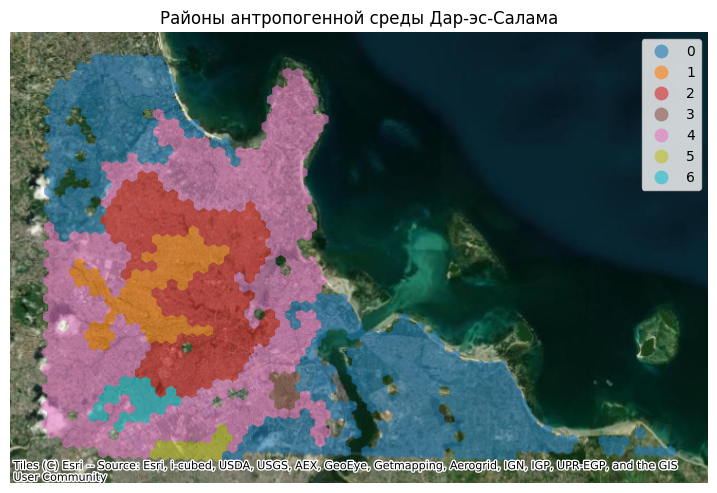

In [40]:
# Картирование семи кластеров
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# Картограмма уникальных значений, включая легенду и отсутствие границ
data.plot(
    column='sagg7cls',
    categorical=True,
    legend=True,
    linewidth=0,
    alpha=0.6,
    ax=ax
)
# Базовая карта
cx.add_basemap(
    ax,
    crs=data.crs,
    source=cx.providers.Esri.WorldImagery
)
# Скроем отображение осей
ax.set_axis_off()
# Заголовок
plt.title('Районы антропогенной среды Дар-эс-Салама')
# Отображение
plt.show();

#### 4 кластера

In [41]:
# Настроим алгоритм районирования с четырьмя кластерами
sagg4 = cluster.AgglomerativeClustering(n_clusters=4, connectivity=w.sparse)
sagg4

AgglomerativeClustering(connectivity=<1291x1291 sparse matrix of type '<class 'numpy.float64'>'
	with 7076 stored elements in Compressed Sparse Row format>,
                        n_clusters=4)

In [42]:
# Запустим алгоритм районирования
sagg4cls = sagg4.fit(data[built_env])
sagg4cls

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:304: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


AgglomerativeClustering(connectivity=<1291x1291 sparse matrix of type '<class 'numpy.float64'>'
	with 7076 stored elements in Compressed Sparse Row format>,
                        n_clusters=4)

In [43]:
# Добавим метки кластеров в отдельный столбец
data['sagg4cls'] = sagg4cls.labels_

In [44]:
# Проверим правильность выполнения функции
data.head()

index               id  street_length  street_linearity  \
0  897b4c16087ffff  897b4c8ce17ffff       0.011097          0.926700   
1  897b4c16097ffff  897b4c8ec67ffff       0.009181          0.983710   
2  897b4c160b3ffff  897b4c8eba3ffff       0.008357          0.962158   
3  897b4c160b7ffff  897b4c8dd97ffff       0.021292          0.884537   
4  897b4c16183ffff  897b4c8ce77ffff       0.008777          0.959906   

   building_density  building_coverage  \
0             138.0          15.789853   
1              33.0           3.722600   
2              82.0           9.491595   
3             122.0           7.245560   
4             113.0          11.806652   

                                            geometry  sagg7cls  sagg4cls  
0  POLYGON ((39.23750 -6.73264, 39.23752 -6.73071...         0         2  
1  POLYGON ((39.23914 -6.73559, 39.23916 -6.73366...         0         2  
2  POLYGON ((39.23416 -6.73254, 39.23418 -6.73061...         0         2  
3  POLYGON ((39.23082 -6.73244, 39.23084 -6.73050...         0         2  
4  POLYGON ((39.21745 -6.73202, 39.21747 -6.73009...         0         2

#### Картирование 4 кластеров

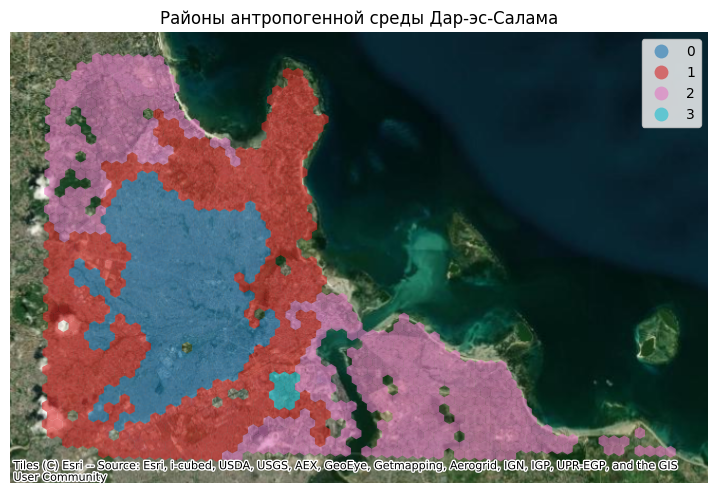

In [45]:
# Картирование четырех кластеров
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# Картограмма уникальных значений, включая легенду и отсутствие границ
data.plot(
    column='sagg4cls',
    categorical=True,
    legend=True,
    linewidth=0,
    alpha=0.6,
    ax=ax
)
# Базовая карта
cx.add_basemap(
    ax,
    crs=data.crs,
    source=cx.providers.Esri.WorldImagery
)
# Скроем отображение осей
ax.set_axis_off()
# Заголовок
plt.title('Районы антропогенной среды Дар-эс-Салама')
# Отображение
plt.show();

#### 10 кластеров

In [46]:
# Настроим алгоритм районирования с десятью кластерами
sagg10 = cluster.AgglomerativeClustering(n_clusters=10,  connectivity=w.sparse)
sagg10

AgglomerativeClustering(connectivity=<1291x1291 sparse matrix of type '<class 'numpy.float64'>'
	with 7076 stored elements in Compressed Sparse Row format>,
                        n_clusters=10)

In [47]:
# Запустим алгоритм районирования
sagg10cls = sagg10.fit(data[built_env])
sagg10cls

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:304: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


AgglomerativeClustering(connectivity=<1291x1291 sparse matrix of type '<class 'numpy.float64'>'
	with 7076 stored elements in Compressed Sparse Row format>,
                        n_clusters=10)

In [48]:
# Добавим метки кластеров в отдельный столбец
data['sagg10cls'] = sagg10cls.labels_

In [49]:
# Проверим правильность выполнения функции
data.head()

index               id  street_length  street_linearity  \
0  897b4c16087ffff  897b4c8ce17ffff       0.011097          0.926700   
1  897b4c16097ffff  897b4c8ec67ffff       0.009181          0.983710   
2  897b4c160b3ffff  897b4c8eba3ffff       0.008357          0.962158   
3  897b4c160b7ffff  897b4c8dd97ffff       0.021292          0.884537   
4  897b4c16183ffff  897b4c8ce77ffff       0.008777          0.959906   

   building_density  building_coverage  \
0             138.0          15.789853   
1              33.0           3.722600   
2              82.0           9.491595   
3             122.0           7.245560   
4             113.0          11.806652   

                                            geometry  sagg7cls  sagg4cls  \
0  POLYGON ((39.23750 -6.73264, 39.23752 -6.73071...         0         2   
1  POLYGON ((39.23914 -6.73559, 39.23916 -6.73366...         0         2   
2  POLYGON ((39.23416 -6.73254, 39.23418 -6.73061...         0         2   
3  POLYGON ((39.23082 -6.73244, 39.23084 -6.73050...         0         2   
4  POLYGON ((39.21745 -6.73202, 39.21747 -6.73009...         0         2   

   sagg10cls  
0          1  
1          1  
2          1  
3          1  
4          1

#### Картирование 10 кластеров

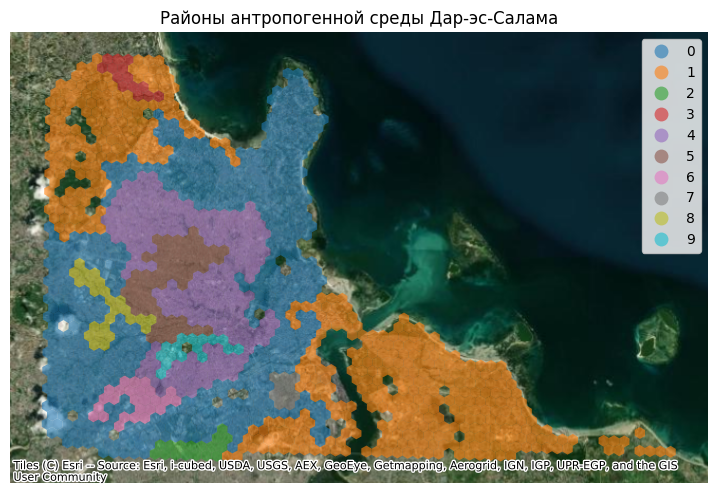

In [50]:
# Картирование десяти кластеров
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# Картограмма уникальных значений, включая легенду и отсутствие границ
data.plot(
    column='sagg10cls',
    categorical=True,
    legend=True,
    linewidth=0,
    alpha=0.6,
    ax=ax
)
# Базовая карта
cx.add_basemap(
    ax,
    crs=data.crs,
    source=cx.providers.Esri.WorldImagery
)
# Скроем отображение осей
ax.set_axis_off()
# Заголовок
plt.title('Районы антропогенной среды Дар-эс-Салама')
# Отображение
plt.show();

In [51]:
# Запишем группы кластеров в отдельную переменную
sagg = [
    'sagg4cls',
    'sagg7cls',
    'sagg10cls'
]

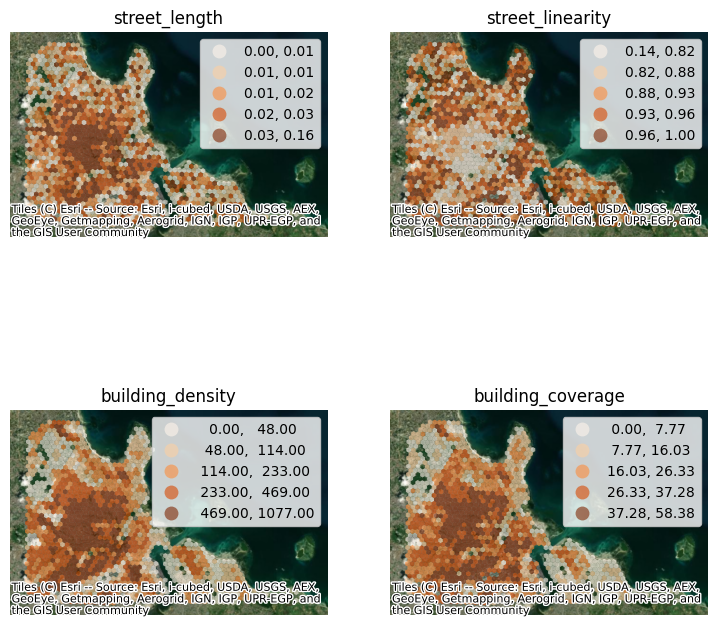

In [52]:
#  Переменные для системы шестиугольной сетки H3, уровень масштабирования 8:
# *   Длина улицы: общая длина улиц в шестиугольнике
# *   Линейность улиц: мера регулярности уличной сети
# *   Плотность застройки: количество зданий на шестиугольник
# *   Покрытие зданий: доля шестиугольника, занятая зданиями

# Настройка фигуры и осей графика
f, axs = plt.subplots(2,2, figsize=(9, 9))
# Сделаем оси доступными с помощью одинарной индексации
axs = axs.flatten()
# Запустим цикл для построения графиков со всеми интересующими переменными
for i, col in enumerate(built_env):
  ax=axs[i]
  data.plot(
      column=col,
      scheme='Quantiles',
      legend=True,
      alpha=0.6,
      cmap='Oranges',
      ax=ax
      )
  # Скроем отображение осей
  ax.set_axis_off()
  # Установим заголовки осей с именем отображаемой переменной
  ax.set_title(col)
  # Базовая карта
  cx.add_basemap(
      ax,
      crs=data.crs,
      source=cx.providers.Esri.WorldImagery
      )
# Отображение
plt.show();

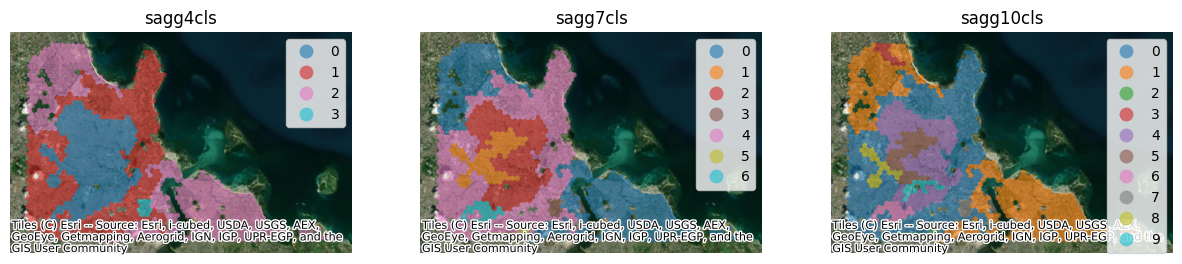

In [53]:
# Сравним полученные группы кластеров
# Настройка фигуры и осей графика
f, axs = plt.subplots(1, 3, figsize=(15,15))
# Сделаем оси доступными с помощью одинарной индексации
axs = axs.flatten()
# Запустим цикл для построения графиков со всеми интересующими переменными
for i, col in enumerate(sagg):
  # Выберем ось для отображения карты
  ax=axs[i]
  # Построим карты
  data.plot(
      ax=ax,
      column=col,
      categorical=True,
      legend=True,
      linewidth=0,
      alpha=0.6
      )
  # Базовая карта
  cx.add_basemap(
      ax,
      crs=data.crs,
      source=cx.providers.Esri.WorldImagery
      )
  # Скроем отображение осей
  ax.set_axis_off()
  # Установим заголовки осей с именем отображаемой переменной
  ax.set_title(col)
plt.show();

Изучим категории статистически. Это позволит нам охарактеризовать их, дав представление о том, какие наблюдения входят в состав каждого из них. В качестве первого шага давайте найдем, сколько наблюдений находится в каждой категории.

In [61]:
# Найдем, сколько наблюдений находится в каждой из категорий
sagg7sizes = data.groupby('sagg7cls').size()
sagg4sizes = data.groupby('sagg4cls').size()
sagg10sizes = data.groupby('sagg10cls').size()
print(sagg7sizes, sagg4sizes, sagg10sizes)

sagg7cls
0    462
1     83
2    208
3     10
4    485
5     17
6     26
dtype: int64 sagg4cls
0    317
1    502
2    462
3     10
dtype: int64 sagg10cls
0    485
1    448
2     17
3     14
4    192
5     58
6     26
7     10
8     25
9     16
dtype: int64


Мы сгруппировали наблюдения по созданным категориям и подсчитали, сколько из них содержит каждая. Для более наглядного отображения результатов построим гистограмму.

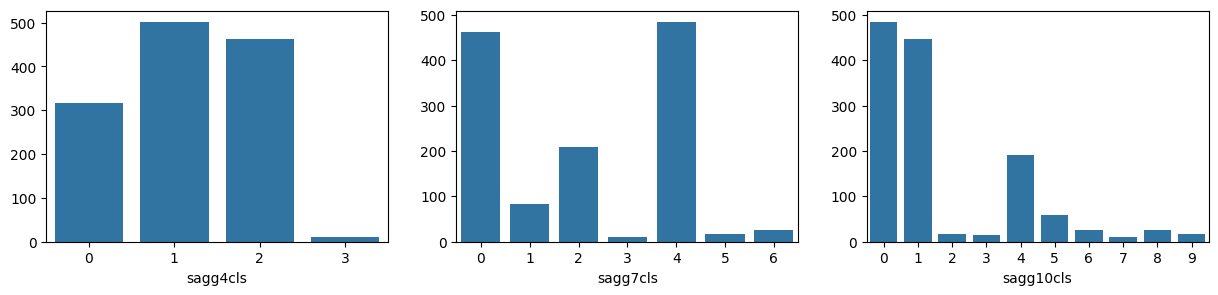

In [121]:
# Построим гистограммы по заданным категориям
fig, axes= plt.subplots(1, 3, figsize=(15,3))
sns.barplot(x=sagg4sizes.index, y=sagg4sizes.values, ax=axes[0])
# axes[0].set_title('sagg4sizes')
sns.barplot(x=sagg7sizes.index, y=sagg7sizes.values, ax=axes[1])
# axes[1].set_title('sagg7sizes')
sns.barplot(x=sagg10sizes.index, y=sagg10sizes.values, ax=axes[2])
# axes[2].set_title('sagg10sizes')
plt.show();

**Выводы:**
*   С помощью алгоритма районирования было построено три модели. Их применение зависит от цели исследования. Модель с четырьмя кластерами выглядит более обобщенной и скорее подходит для быстрого анализа, а с десятью — более детальной. Наиболее оптимальной кажется модель с семью кластерами, так как здесь четко прослеживается периферия и неоднородный центр;
*   Что касается размеров полученных районов, то они несбалансированны вследствие природы лежащих в основе данных. Имеются как большие территории, которые схожи и, следовательно, сгрупппированы в один и тот же район (кластеры с номерами ноль и четыре), так и небольшие по размеру территории с достаточно разными характеристиками, чтобы их можно было отнести к одному району (кластеры с номерами один, два три, пять и шесть).

### Объединение границ антропогенных районов

Определив оптимальное количество районов, объединим полигоны для каждого из района.

In [56]:
def dissolve(gs):
    '''
    Take a series of polygons and dissolve them into a single one

    Arguments
    ---------
    gs        : GeoSeries
                Sequence of polygons to be dissolved
    Returns
    -------
    dissolved : Polygon
                Single polygon containing all the polygons in `gs`
    '''
    return gs.unary_union

In [57]:
# Объединим полигоны на основании полученных районов 'sagg7cls'
data_regions = gpd.GeoSeries(data.groupby(data['sagg7cls']).apply(dissolve), crs=data.crs)

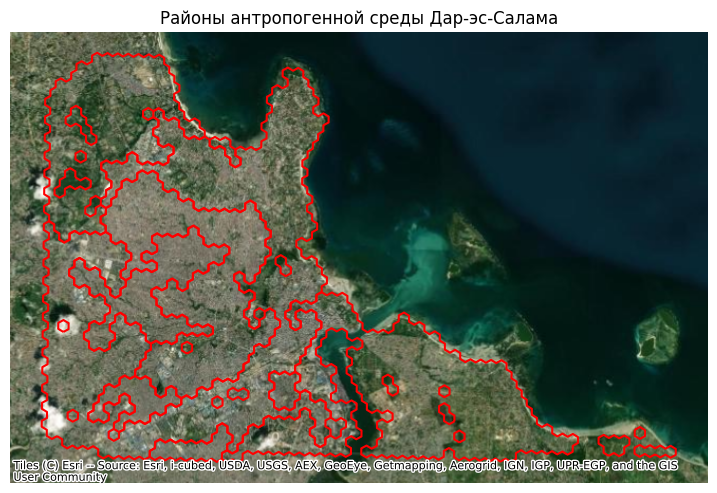

In [58]:
# Настройка фигуры и осей графика
f, ax = plt.subplots(1, figsize=(9, 9))
# График с границами полученных районов
data_regions.plot(
    ax=ax,
    linewidth=1.5,
    facecolor='None',
    edgecolor='red'
)
# Базовая карта
cx.add_basemap(
    ax,
    crs=data.crs,
    source=cx.providers.Esri.WorldImagery
)
# Скроем отображение осей
ax.set_axis_off()
# Заголовок
plt.title('Районы антропогенной среды Дар-эс-Салама')
# Отображение
plt.show();

## Этап 3. Результаты исследования

### Выводы

1.   В ходе решения первого задания "Геодемография Нью-Йорка" была стандартизирована таблица по размеру каждого тракта так, что значения стали варьироваться от 0 (населения данной этнической группы нет) до 1 (все население на участке принадлежит к этой группе), запущен алгоритм k-means для десяти кластеров, после чего полученные кластеры были нанесены на карту. В результе можно сделать следующие выводы:
   *   Поверхностный анализ указывает на наличие сильной пространственной структуры в распределении цветов. Большие по размерам кластеры — с номерами один, четыре, шесть, семь, восемь и девять, — находятся в разных районах города. В то время как небольшие — с номерами ноль, два, три и пять, — распределены по городу более равномерно и чаще соседствуют друг с другом;
   *   Также довольно четко можно проследить и соответствие полученных кластеров с этническими группами относительно нейборхудов. Например, розовый кластер с номером шесть хорошо "ложится" на Гарлем, Ямайку и Южную Ямайку. А бирюзовый кластер с номером девять — на Мотт Хавен (с преобладанием латиноамериканского населения) и т.д.
2.   В ходе решения второго задания "Районирование Дар-эс-Салама" было проведено районирование, которое разделило город Дар-эс-салам в соответствии с его антропогенной средой. Для этого была создана матрица пространственных весов для фиксации пространственных отношений между шестиугольниками, настроен алгоритм районирования с заданным количеством кластеров (четыре, семь и десять). Выбран наиболее оптимальный вариант с последующим созданием географии границ каждого района:
   *   С помощью алгоритма районирования было построено три модели. Их применение зависит от цели исследования. Модель с четырьмя кластерами выглядит более обобщенной и скорее подходит для быстрого анализа, а с десятью — более детальной. Наиболее оптимальной кажется модель с семью кластерами, так как здесь четко прослеживается периферия и неоднородный центр;
   *   Что касается размеров полученных районов, то они несбалансированны вследствие природы лежащих в основе данных. Имеются как большие территории, которые схожи и, следовательно, сгрупппированы в один и тот же район (кластеры с номерами ноль и четыре), так и небольшие по размеру территории с достаточно разными характеристиками, чтобы их можно было отнести к одному району (кластеры с номерами один, два три, пять и шесть).



